In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "data/employee selection.csv"
data = pd.read_csv(path, header=None)
target_map = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
criteria_nr = 4
data[criteria_nr] = data[criteria_nr].apply(lambda x: target_map[x])
data = data.drop_duplicates()
data_input = data.iloc[:, :criteria_nr]
data_target = data[criteria_nr]


X_train, X_test, y_train, y_test = train_test_split(
    data_input, data_target, test_size=0.2, random_state=1234
)


In [3]:
params = {
    "max_depth": criteria_nr * 2,
    "eta": 0.1,
    "nthread": 2,
    "seed": 0,
    "eval_metric": "rmse",
    "monotone_constraints": "(" + ",".join(["1"] * criteria_nr) + ")",
    "n_estimators": 1,
}


In [4]:
model = xgb.XGBClassifier(**params)

_ =model.fit(X_train, y_train)

In [5]:
y_pred = model.predict(X_train)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_train, predictions)
print("Accuracy train: %.2f%%" % (accuracy * 100.0))

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy test: %.2f%%" % (accuracy * 100.0))


Accuracy train: 87.65%
Accuracy test: 83.72%


In [6]:
booster = model.get_booster()

In [7]:
from xgboost import plot_tree

<AxesSubplot:>

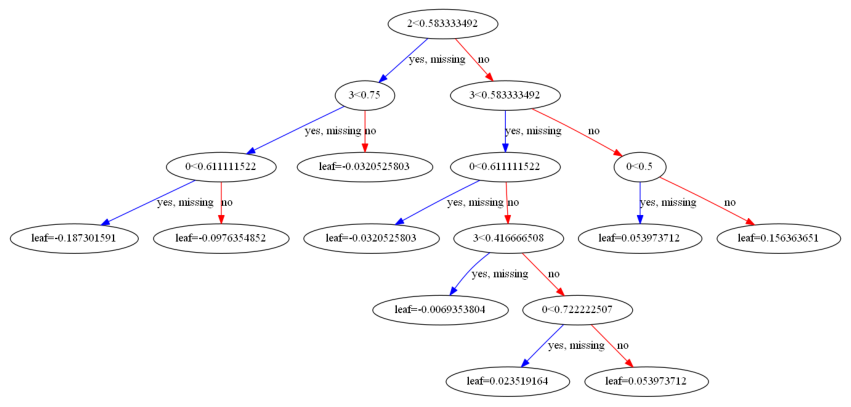

In [8]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_tree(model, ax=ax, num_trees=0)

In [9]:
def partial_dependency(booster, X, y, crite = -1):
    grid = np.linspace(0,1,50)
    y_pred = np.zeros(len(grid))
    for i, val in enumerate(grid):
        X_temp = X.copy()
        X_temp[:, f_id] = val
        data = xgb.DMatrix( pd.DataFrame(X_temp) )
        y_pred[i] = np.average(booster.predict(data))

    return grid, y_pred

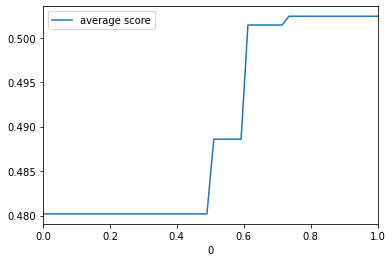

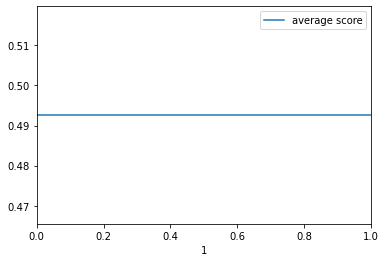

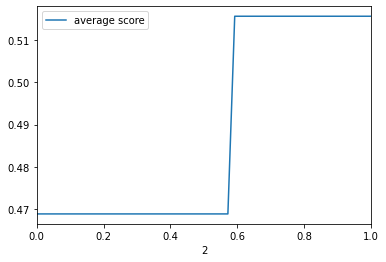

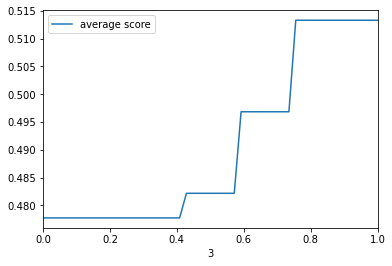

In [10]:
grid = np.linspace(0,1,50)
for c in range(criteria_nr):
    y_pred = np.zeros(len(grid))
    for i, val in enumerate(grid):
        X_temp = X_train.values.copy()
        X_temp[:, c] = val
        data = xgb.DMatrix( pd.DataFrame(X_temp) )
        y_pred[i] = np.average(booster.predict(data))
        
    fig, ax = plt.subplots()
    ax.plot(grid, y_pred,  label='average score')
    ax.set_xlim(0, 1)
    ax.set_xlabel(c)
    ax.legend()

In [11]:
booster.get_fscore()

{'0': 4.0, '2': 1.0, '3': 3.0}

In [12]:
booster.get_score(importance_type='gain')

{'0': 1.6790311336517334, '2': 59.4455680847168, '3': 7.995089054107666}